# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Data

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,No
1,15810944,Male,35.0,20000,No
2,15668575,Female,NaN,43000,No
3,15603246,Female,27.0,57000,No
4,15804002,Male,19.0,76000,No


In [3]:
dataset.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,399.000000,400.000000
mean,1.569154e+07,37.684211,69742.500000
std,7.165832e+04,10.479726,34096.960282
min,1.556669e+07,18.000000,15000.000000
25%,1.562676e+07,30.000000,43000.000000
50%,1.569434e+07,37.000000,70000.000000
75%,1.575036e+07,46.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


In [4]:
x = dataset.iloc[:, 1:-1].values  # get all row data expect from the first and last column
y = dataset.iloc[:, -1].values  # get the last column depentant variable data for all rows

In [5]:
print(x[:10,:])

[['Male' 19.0 19000]
 ['Male' 35.0 20000]
 ['Female' nan 43000]
 ['Female' 27.0 57000]
 ['Male' 19.0 76000]
 ['Male' 27.0 58000]
 ['Female' 27.0 84000]
 ['Female' 32.0 150000]
 ['Male' 25.0 33000]
 ['Female' 35.0 65000]]


In [6]:
print(y[:10])

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No']


## Replacing missing data with mean

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
# fit method will look for missing values and calulate mean for 1st and 2nd columns
imputer.fit(x[:,1:3])
# transform method will replace missign value with calulated value in 1st(age) and 2nd(salary) columns
x[:,1:3]=imputer.transform(x[:,1:3])

In [8]:
print(x[:10,:])

[['Male' 19.0 19000.0]
 ['Male' 35.0 20000.0]
 ['Female' 37.68421052631579 43000.0]
 ['Female' 27.0 57000.0]
 ['Male' 19.0 76000.0]
 ['Male' 27.0 58000.0]
 ['Female' 27.0 84000.0]
 ['Female' 32.0 150000.0]
 ['Male' 25.0 33000.0]
 ['Female' 35.0 65000.0]]


## Encoding categorical data

One hot encoding turn country columns to 3(as there are 3 countires).It created binary vector for each country so that there is no order between these countries. Final output will be - France vector 1,0,0 Spain 0,1,0 and Germany 0,0,1


In [10]:
#encoding independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') # Apply tranformation to change country to binary vector  Remainder keep age and salary
x = np.array(ct.fit_transform(x)) #fitting and transforming together and force output to be numpy array
print(x[:10,:])

[[0.0 1.0 19.0 19000.0]
 [0.0 1.0 35.0 20000.0]
 [1.0 0.0 37.68421052631579 43000.0]
 [1.0 0.0 27.0 57000.0]
 [0.0 1.0 19.0 76000.0]
 [0.0 1.0 27.0 58000.0]
 [1.0 0.0 27.0 84000.0]
 [1.0 0.0 32.0 150000.0]
 [0.0 1.0 25.0 33000.0]
 [1.0 0.0 35.0 65000.0]]


In [12]:
## Encoding dependent variable
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


# Splitting the dataset into training and test set  

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state


In [14]:
print(x_train[:10,:])

[[0.0 1.0 26.0 15000.0]
 [0.0 1.0 60.0 102000.0]
 [1.0 0.0 38.0 112000.0]
 [0.0 1.0 40.0 107000.0]
 [1.0 0.0 42.0 53000.0]
 [0.0 1.0 35.0 59000.0]
 [0.0 1.0 48.0 41000.0]
 [1.0 0.0 48.0 134000.0]
 [1.0 0.0 38.0 113000.0]
 [0.0 1.0 29.0 148000.0]]


In [15]:
print(x_test[:10,:])

[[0.0 1.0 30.0 87000.0]
 [1.0 0.0 38.0 50000.0]
 [0.0 1.0 35.0 75000.0]
 [1.0 0.0 30.0 79000.0]
 [1.0 0.0 35.0 50000.0]
 [0.0 1.0 27.0 20000.0]
 [1.0 0.0 31.0 15000.0]
 [0.0 1.0 36.0 144000.0]
 [1.0 0.0 18.0 68000.0]
 [0.0 1.0 47.0 43000.0]]


In [16]:
print(y_train[:10])

[0 1 0 1 0 0 1 1 1 1]


In [17]:
print(y_test[:10])

[0 0 0 0 0 0 0 1 0 0]


# Feature scaling

**Feature Scaling Techniques**

1. Standardization
   Transforms data to have a mean of 0 and a standard deviation of 1.
   Formula: X_stan = (x - mean(x)) / std(x)
   Resulting values typically range between -3 and +3.
   Recommended for most cases as it works well across various distributions.

2. Normalization
   Scales data to a range between 0 and 1.
   Formula: X_norm = (x - min(x)) / (max(x) - min(x))
   Useful for data with a normal distribution.

Feature Scaling for Dummy Variables:
   Dummy variables are already scaled between 0 and 1.
   Applying additional scaling like standardization is unnecessary and can obscure categorical information.
   There is no strong evidence that scaling dummy variables improves model performance.


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# take all columns from age. fit computes mean and median of each value. transform apply formula to tranform them to Xstand
x_train[:,3:] = scaler.fit_transform(x_train[:,3:])
#Need to apply the same scaler on both train and test set to get same transformation
x_test[:,3:] = scaler.transform(x_test[:,3:])
print(x_train[:10,:])

[[0.0 1.0 26.0 -1.5849702974485314]
 [0.0 1.0 60.0 0.9309867236544418]
 [1.0 0.0 38.0 1.2201771858501858]
 [0.0 1.0 40.0 1.0755819547523138]
 [1.0 0.0 42.0 -0.486046541104704]
 [0.0 1.0 35.0 -0.3125322637872576]
 [0.0 1.0 48.0 -0.8330750957395968]
 [1.0 0.0 48.0 1.8563962026808227]
 [1.0 0.0 38.0 1.2490962320697603]
 [0.0 1.0 29.0 2.261262849754864]]


In [19]:
print(x_test[:10,:])

[[0.0 1.0 30.0 0.4972010303608257]
 [1.0 0.0 38.0 -0.5728036797634273]
 [0.0 1.0 35.0 0.15017247572593284]
 [1.0 0.0 30.0 0.26584866060423046]
 [1.0 0.0 35.0 -0.5728036797634273]
 [0.0 1.0 27.0 -1.4403750663506594]
 [1.0 0.0 31.0 -1.5849702974485314]
 [0.0 1.0 36.0 2.1455866648765665]
 [1.0 0.0 18.0 -0.05226084781108797]
 [0.0 1.0 47.0 -0.7752370033004481]]


# Build Model

## Build Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(penalty = 'l2', C = 1000, random_state=0)
regressor.fit(x_train,y_train)

LogisticRegression(C=1000, random_state=0)

In [21]:
#predicting the test set results
y_pred = regressor.predict(x_test)

In [22]:
## Evaluate Model

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f"R^2 Score is {r2}")
print(f"Mean Absolute Error is {mae}")
print(f"Mean Squared Error {mse}")

R^2 Score is 0.5183698672429762
Mean Absolute Error is 0.10833333333333334
Mean Squared Error 0.10833333333333334


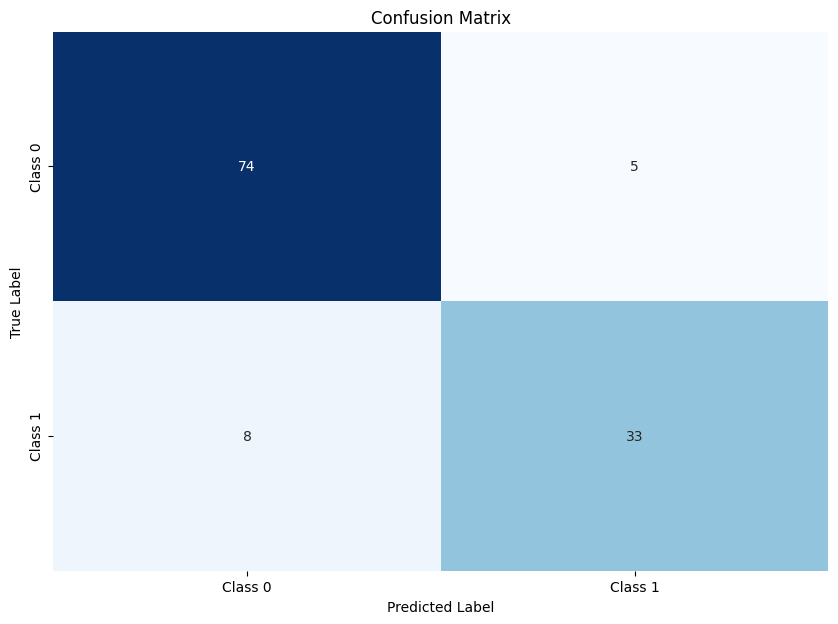

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


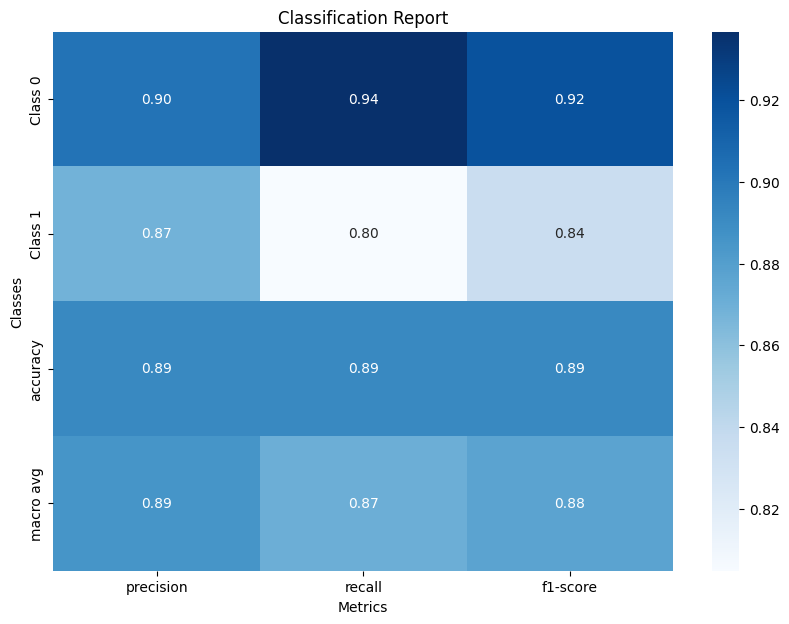

In [31]:
from sklearn.metrics import classification_report
import pandas as pd

# Compute the classification report
cr = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Display the DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cr_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Blues', fmt='.2f',
            xticklabels=cr_df.columns[:-1], yticklabels=cr_df.index[:-1])
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()
